In [1]:
import pandas as pd
import numpy as np
import mlxtend as mlx
import sklearn as sk
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('olimpiadas.csv', encoding = 'latin_1')
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [3]:
data.isnull().values.any()

True

In [4]:
data.isnull().sum().sum()

363853

In [5]:
data.columns[data.isnull().any()]

Index(['Age', 'Height', 'Weight', 'Medal'], dtype='object')

In [6]:
df = data.drop(['Team', 'Year', 'Season', 'City', 'Sport', 'ID'], axis=1)
df


,Name,Sex,Age,Height,Weight,NOC,Games,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,Luge Mixed (Men)'s Doubles,NaN
271112,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,"Ski Jumping Men's Large Hill, Individual",NaN
271113,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,"Ski Jumping Men's Large Hill, Team",NaN
271114,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,Bobsleigh Men's Four,NaN


In [7]:
df['Medal']=df['Medal'].fillna("No")
df

,Name,Sex,Age,Height,Weight,NOC,Games,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,Basketball Men's Basketball,No
1,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,Judo Men's Extra-Lightweight,No
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,DEN,1920 Summer,Football Men's Football,No
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,NED,1988 Winter,Speed Skating Women's 500 metres,No
...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.0,89.0,POL,1976 Winter,Luge Mixed (Men)'s Doubles,No
271112,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,"Ski Jumping Men's Large Hill, Individual",No
271113,Piotr ya,M,27.0,176.0,59.0,POL,2014 Winter,"Ski Jumping Men's Large Hill, Team",No
271114,Tomasz Ireneusz ya,M,30.0,185.0,96.0,POL,1998 Winter,Bobsleigh Men's Four,No


In [8]:
df['Age']= df['Age'].fillna(df['Age'].mean())
df['Weight']= df['Weight'].fillna(df['Weight'].mean())
df['Height']= df['Height'].fillna(df['Height'].mean())

In [9]:
df.isnull().values.any()

False

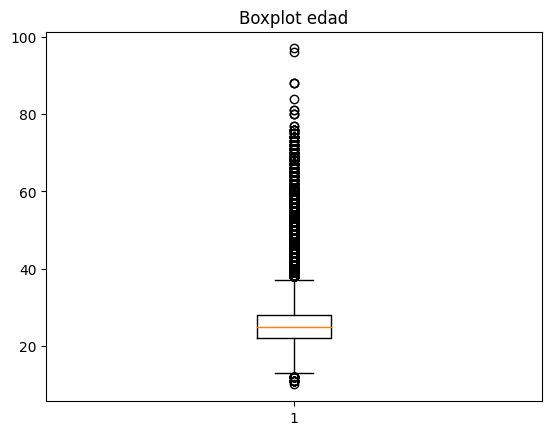

In [10]:
boxplot_age = df['Age']
plt.boxplot(boxplot_age)
plt.title('Boxplot edad')
plt.show()

In [11]:
from matplotlib.cbook import boxplot_stats
stats = boxplot_stats(boxplot_age)
stats = stats[0]
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(max,min,len(outliers))

37.0 13.0 11981


In [12]:
corte1 = min
corte2 = max
df['Age_cat'] = "Baja"
df.loc[(df['Age'] > corte1) & (df['Age'] <= corte2), 'Age_cat'] = "Media"
df.loc[df['Age'] > corte2, 'Age_cat'] = "Alta"
df

,Name,Sex,Age,Height,Weight,NOC,Games,Event,Medal,Age_cat
0,A Dijiang,M,24.0,180.00000,80.000000,CHN,1992 Summer,Basketball Men's Basketball,No,Media
1,A Lamusi,M,23.0,170.00000,60.000000,CHN,2012 Summer,Judo Men's Extra-Lightweight,No,Media
2,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,DEN,1920 Summer,Football Men's Football,No,Media
3,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,DEN,1900 Summer,Tug-Of-War Men's Tug-Of-War,Gold,Media
4,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,NED,1988 Winter,Speed Skating Women's 500 metres,No,Media
...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.00000,89.000000,POL,1976 Winter,Luge Mixed (Men)'s Doubles,No,Media
271112,Piotr ya,M,27.0,176.00000,59.000000,POL,2014 Winter,"Ski Jumping Men's Large Hill, Individual",No,Media
271113,Piotr ya,M,27.0,176.00000,59.000000,POL,2014 Winter,"Ski Jumping Men's Large Hill, Team",No,Media
271114,Tomasz Ireneusz ya,M,30.0,185.00000,96.000000,POL,1998 Winter,Bobsleigh Men's Four,No,Media


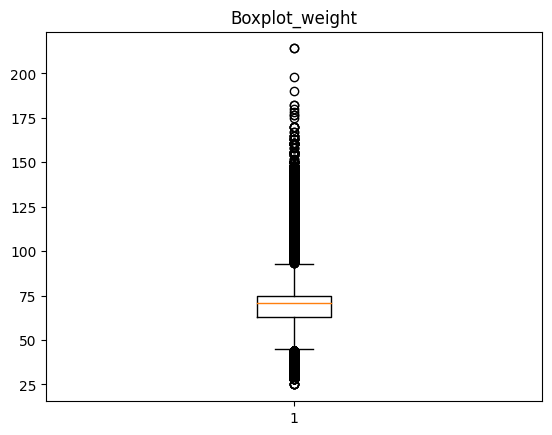

In [13]:
boxplot_weight = df['Weight']
plt.boxplot(boxplot_weight)
plt.title('Boxplot_weight')
plt.show()

In [14]:
from matplotlib.cbook import boxplot_stats
stats = boxplot_stats(boxplot_weight)
stats = stats[0]
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(max,min,len(outliers))

93.0 45.0 15574


In [15]:
corte1 = min
corte2 = max
df['Weight_cat'] = "Delgado"
df.loc[(df['Weight'] > corte1) & (df['Weight'] <= corte2), 'Weight_cat'] = "En forma"
df.loc[df['Weight'] > corte2, 'Weight_cat'] = "Grande"
df

,Name,Sex,Age,Height,Weight,NOC,Games,Event,Medal,Age_cat,Weight_cat
0,A Dijiang,M,24.0,180.00000,80.000000,CHN,1992 Summer,Basketball Men's Basketball,No,Media,En forma
1,A Lamusi,M,23.0,170.00000,60.000000,CHN,2012 Summer,Judo Men's Extra-Lightweight,No,Media,En forma
2,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,DEN,1920 Summer,Football Men's Football,No,Media,En forma
3,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,DEN,1900 Summer,Tug-Of-War Men's Tug-Of-War,Gold,Media,En forma
4,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,NED,1988 Winter,Speed Skating Women's 500 metres,No,Media,En forma
...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.00000,89.000000,POL,1976 Winter,Luge Mixed (Men)'s Doubles,No,Media,En forma
271112,Piotr ya,M,27.0,176.00000,59.000000,POL,2014 Winter,"Ski Jumping Men's Large Hill, Individual",No,Media,En forma
271113,Piotr ya,M,27.0,176.00000,59.000000,POL,2014 Winter,"Ski Jumping Men's Large Hill, Team",No,Media,En forma
271114,Tomasz Ireneusz ya,M,30.0,185.00000,96.000000,POL,1998 Winter,Bobsleigh Men's Four,No,Media,Grande


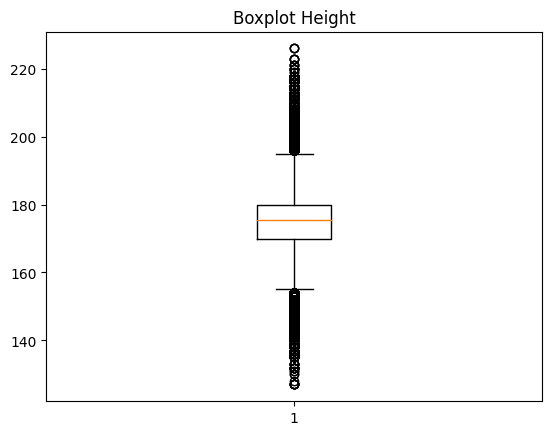

In [16]:
boxplot_Height = df['Height']
plt.boxplot(boxplot_Height)
plt.title('Boxplot Height')
plt.show()

In [17]:
from matplotlib.cbook import boxplot_stats
stats = boxplot_stats(boxplot_Height)
stats = stats[0]
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(max,min,len(outliers))

195.0 155.0 10532


In [18]:
corte1 = min
corte2 = max
df['Height_cat'] = "Bajo"
df.loc[(df['Height'] > corte1) & (df['Height'] <= corte2), 'Height_cat'] = "Medio"
df.loc[df['Height'] > corte2, 'Height_cat'] = "Alto"
df

,Name,Sex,Age,Height,Weight,NOC,Games,Event,Medal,Age_cat,Weight_cat,Height_cat
0,A Dijiang,M,24.0,180.00000,80.000000,CHN,1992 Summer,Basketball Men's Basketball,No,Media,En forma,Medio
1,A Lamusi,M,23.0,170.00000,60.000000,CHN,2012 Summer,Judo Men's Extra-Lightweight,No,Media,En forma,Medio
2,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,DEN,1920 Summer,Football Men's Football,No,Media,En forma,Medio
3,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,DEN,1900 Summer,Tug-Of-War Men's Tug-Of-War,Gold,Media,En forma,Medio
4,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,NED,1988 Winter,Speed Skating Women's 500 metres,No,Media,En forma,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,29.0,179.00000,89.000000,POL,1976 Winter,Luge Mixed (Men)'s Doubles,No,Media,En forma,Medio
271112,Piotr ya,M,27.0,176.00000,59.000000,POL,2014 Winter,"Ski Jumping Men's Large Hill, Individual",No,Media,En forma,Medio
271113,Piotr ya,M,27.0,176.00000,59.000000,POL,2014 Winter,"Ski Jumping Men's Large Hill, Team",No,Media,En forma,Medio
271114,Tomasz Ireneusz ya,M,30.0,185.00000,96.000000,POL,1998 Winter,Bobsleigh Men's Four,No,Media,Grande,Medio


In [19]:
datos = df.drop(['Age', 'Height', 'Weight'], axis=1)
datos

,Name,Sex,NOC,Games,Event,Medal,Age_cat,Weight_cat,Height_cat
0,A Dijiang,M,CHN,1992 Summer,Basketball Men's Basketball,No,Media,En forma,Medio
1,A Lamusi,M,CHN,2012 Summer,Judo Men's Extra-Lightweight,No,Media,En forma,Medio
2,Gunnar Nielsen Aaby,M,DEN,1920 Summer,Football Men's Football,No,Media,En forma,Medio
3,Edgar Lindenau Aabye,M,DEN,1900 Summer,Tug-Of-War Men's Tug-Of-War,Gold,Media,En forma,Medio
4,Christine Jacoba Aaftink,F,NED,1988 Winter,Speed Skating Women's 500 metres,No,Media,En forma,Medio
...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,POL,1976 Winter,Luge Mixed (Men)'s Doubles,No,Media,En forma,Medio
271112,Piotr ya,M,POL,2014 Winter,"Ski Jumping Men's Large Hill, Individual",No,Media,En forma,Medio
271113,Piotr ya,M,POL,2014 Winter,"Ski Jumping Men's Large Hill, Team",No,Media,En forma,Medio
271114,Tomasz Ireneusz ya,M,POL,1998 Winter,Bobsleigh Men's Four,No,Media,Grande,Medio


In [20]:
dt = datos
dt

,Name,Sex,NOC,Games,Event,Medal,Age_cat,Weight_cat,Height_cat
0,A Dijiang,M,CHN,1992 Summer,Basketball Men's Basketball,No,Media,En forma,Medio
1,A Lamusi,M,CHN,2012 Summer,Judo Men's Extra-Lightweight,No,Media,En forma,Medio
2,Gunnar Nielsen Aaby,M,DEN,1920 Summer,Football Men's Football,No,Media,En forma,Medio
3,Edgar Lindenau Aabye,M,DEN,1900 Summer,Tug-Of-War Men's Tug-Of-War,Gold,Media,En forma,Medio
4,Christine Jacoba Aaftink,F,NED,1988 Winter,Speed Skating Women's 500 metres,No,Media,En forma,Medio
...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,M,POL,1976 Winter,Luge Mixed (Men)'s Doubles,No,Media,En forma,Medio
271112,Piotr ya,M,POL,2014 Winter,"Ski Jumping Men's Large Hill, Individual",No,Media,En forma,Medio
271113,Piotr ya,M,POL,2014 Winter,"Ski Jumping Men's Large Hill, Team",No,Media,En forma,Medio
271114,Tomasz Ireneusz ya,M,POL,1998 Winter,Bobsleigh Men's Four,No,Media,Grande,Medio


In [21]:
dummy = pd.get_dummies(datos['Sex'])
datos = pd.concat([datos, dummy], axis=1)
datos.drop('Sex', axis=1, inplace=True)
datos

,Name,NOC,Games,Event,Medal,Age_cat,Weight_cat,Height_cat,F,M
0,A Dijiang,CHN,1992 Summer,Basketball Men's Basketball,No,Media,En forma,Medio,0,1
1,A Lamusi,CHN,2012 Summer,Judo Men's Extra-Lightweight,No,Media,En forma,Medio,0,1
2,Gunnar Nielsen Aaby,DEN,1920 Summer,Football Men's Football,No,Media,En forma,Medio,0,1
3,Edgar Lindenau Aabye,DEN,1900 Summer,Tug-Of-War Men's Tug-Of-War,Gold,Media,En forma,Medio,0,1
4,Christine Jacoba Aaftink,NED,1988 Winter,Speed Skating Women's 500 metres,No,Media,En forma,Medio,1,0
...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,POL,1976 Winter,Luge Mixed (Men)'s Doubles,No,Media,En forma,Medio,0,1
271112,Piotr ya,POL,2014 Winter,"Ski Jumping Men's Large Hill, Individual",No,Media,En forma,Medio,0,1
271113,Piotr ya,POL,2014 Winter,"Ski Jumping Men's Large Hill, Team",No,Media,En forma,Medio,0,1
271114,Tomasz Ireneusz ya,POL,1998 Winter,Bobsleigh Men's Four,No,Media,Grande,Medio,0,1


In [22]:
dummy = pd.get_dummies(datos['Age_cat'], prefix = 'Age')
datos = pd.concat([datos, dummy], axis=1)
datos.drop('Age_cat', axis=1, inplace=True)
datos

,Name,NOC,Games,Event,Medal,Weight_cat,Height_cat,F,M,Age_Alta,Age_Baja,Age_Media
0,A Dijiang,CHN,1992 Summer,Basketball Men's Basketball,No,En forma,Medio,0,1,0,0,1
1,A Lamusi,CHN,2012 Summer,Judo Men's Extra-Lightweight,No,En forma,Medio,0,1,0,0,1
2,Gunnar Nielsen Aaby,DEN,1920 Summer,Football Men's Football,No,En forma,Medio,0,1,0,0,1
3,Edgar Lindenau Aabye,DEN,1900 Summer,Tug-Of-War Men's Tug-Of-War,Gold,En forma,Medio,0,1,0,0,1
4,Christine Jacoba Aaftink,NED,1988 Winter,Speed Skating Women's 500 metres,No,En forma,Medio,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,POL,1976 Winter,Luge Mixed (Men)'s Doubles,No,En forma,Medio,0,1,0,0,1
271112,Piotr ya,POL,2014 Winter,"Ski Jumping Men's Large Hill, Individual",No,En forma,Medio,0,1,0,0,1
271113,Piotr ya,POL,2014 Winter,"Ski Jumping Men's Large Hill, Team",No,En forma,Medio,0,1,0,0,1
271114,Tomasz Ireneusz ya,POL,1998 Winter,Bobsleigh Men's Four,No,Grande,Medio,0,1,0,0,1


In [23]:
dummy = pd.get_dummies(datos['Weight_cat'], prefix = 'Weight')
datos = pd.concat([datos, dummy], axis=1)
datos.drop('Weight_cat', axis=1, inplace=True)
datos

,Name,NOC,Games,Event,Medal,Height_cat,F,M,Age_Alta,Age_Baja,Age_Media,Weight_Delgado,Weight_En forma,Weight_Grande
0,A Dijiang,CHN,1992 Summer,Basketball Men's Basketball,No,Medio,0,1,0,0,1,0,1,0
1,A Lamusi,CHN,2012 Summer,Judo Men's Extra-Lightweight,No,Medio,0,1,0,0,1,0,1,0
2,Gunnar Nielsen Aaby,DEN,1920 Summer,Football Men's Football,No,Medio,0,1,0,0,1,0,1,0
3,Edgar Lindenau Aabye,DEN,1900 Summer,Tug-Of-War Men's Tug-Of-War,Gold,Medio,0,1,0,0,1,0,1,0
4,Christine Jacoba Aaftink,NED,1988 Winter,Speed Skating Women's 500 metres,No,Medio,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,POL,1976 Winter,Luge Mixed (Men)'s Doubles,No,Medio,0,1,0,0,1,0,1,0
271112,Piotr ya,POL,2014 Winter,"Ski Jumping Men's Large Hill, Individual",No,Medio,0,1,0,0,1,0,1,0
271113,Piotr ya,POL,2014 Winter,"Ski Jumping Men's Large Hill, Team",No,Medio,0,1,0,0,1,0,1,0
271114,Tomasz Ireneusz ya,POL,1998 Winter,Bobsleigh Men's Four,No,Medio,0,1,0,0,1,0,0,1


In [24]:
dummy = pd.get_dummies(datos['Height_cat'], prefix = 'Height')
datos = pd.concat([datos, dummy], axis=1)
datos.drop('Height_cat', axis=1, inplace=True)
datos

,Name,NOC,Games,Event,Medal,F,M,Age_Alta,Age_Baja,Age_Media,Weight_Delgado,Weight_En forma,Weight_Grande,Height_Alto,Height_Bajo,Height_Medio
0,A Dijiang,CHN,1992 Summer,Basketball Men's Basketball,No,0,1,0,0,1,0,1,0,0,0,1
1,A Lamusi,CHN,2012 Summer,Judo Men's Extra-Lightweight,No,0,1,0,0,1,0,1,0,0,0,1
2,Gunnar Nielsen Aaby,DEN,1920 Summer,Football Men's Football,No,0,1,0,0,1,0,1,0,0,0,1
3,Edgar Lindenau Aabye,DEN,1900 Summer,Tug-Of-War Men's Tug-Of-War,Gold,0,1,0,0,1,0,1,0,0,0,1
4,Christine Jacoba Aaftink,NED,1988 Winter,Speed Skating Women's 500 metres,No,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,POL,1976 Winter,Luge Mixed (Men)'s Doubles,No,0,1,0,0,1,0,1,0,0,0,1
271112,Piotr ya,POL,2014 Winter,"Ski Jumping Men's Large Hill, Individual",No,0,1,0,0,1,0,1,0,0,0,1
271113,Piotr ya,POL,2014 Winter,"Ski Jumping Men's Large Hill, Team",No,0,1,0,0,1,0,1,0,0,0,1
271114,Tomasz Ireneusz ya,POL,1998 Winter,Bobsleigh Men's Four,No,0,1,0,0,1,0,0,1,0,0,1


In [25]:
dummy = pd.get_dummies(datos['Event'])
datos = pd.concat([datos, dummy], axis=1)
datos.drop('Event', axis=1, inplace=True)
datos

,Name,NOC,Games,Medal,F,M,Age_Alta,Age_Baja,Age_Media,Weight_Delgado,...,"Wrestling Men's Super-Heavyweight, Greco-Roman","Wrestling Men's Unlimited Class, Greco-Roman","Wrestling Men's Welterweight, Freestyle","Wrestling Men's Welterweight, Greco-Roman","Wrestling Women's Featherweight, Freestyle","Wrestling Women's Flyweight, Freestyle","Wrestling Women's Heavyweight, Freestyle","Wrestling Women's Light-Heavyweight, Freestyle","Wrestling Women's Lightweight, Freestyle","Wrestling Women's Middleweight, Freestyle"
0,A Dijiang,CHN,1992 Summer,No,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,A Lamusi,CHN,2012 Summer,No,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Gunnar Nielsen Aaby,DEN,1920 Summer,No,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Edgar Lindenau Aabye,DEN,1900 Summer,Gold,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Christine Jacoba Aaftink,NED,1988 Winter,No,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,POL,1976 Winter,No,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
271112,Piotr ya,POL,2014 Winter,No,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
271113,Piotr ya,POL,2014 Winter,No,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
271114,Tomasz Ireneusz ya,POL,1998 Winter,No,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
dummy = pd.get_dummies(datos['Games'])
datos = pd.concat([datos, dummy], axis=1)
datos.drop('Games', axis=1, inplace=True)
datos

,Name,NOC,Medal,F,M,Age_Alta,Age_Baja,Age_Media,Weight_Delgado,Weight_En forma,...,1998 Winter,2000 Summer,2002 Winter,2004 Summer,2006 Winter,2008 Summer,2010 Winter,2012 Summer,2014 Winter,2016 Summer
0,A Dijiang,CHN,No,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,A Lamusi,CHN,No,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,Gunnar Nielsen Aaby,DEN,No,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Edgar Lindenau Aabye,DEN,Gold,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Christine Jacoba Aaftink,NED,No,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,POL,No,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
271112,Piotr ya,POL,No,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
271113,Piotr ya,POL,No,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
271114,Tomasz Ireneusz ya,POL,No,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
dummy = pd.get_dummies(datos['NOC'])
datos = pd.concat([datos, dummy], axis=1)
datos.drop('NOC', axis=1, inplace=True)
datos

,Name,Medal,F,M,Age_Alta,Age_Baja,Age_Media,Weight_Delgado,Weight_En forma,Weight_Grande,...,VIE,VIN,VNM,WIF,YAR,YEM,YMD,YUG,ZAM,ZIM
0,A Dijiang,No,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,A Lamusi,No,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Gunnar Nielsen Aaby,No,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Edgar Lindenau Aabye,Gold,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Christine Jacoba Aaftink,No,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,No,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
271112,Piotr ya,No,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
271113,Piotr ya,No,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
271114,Tomasz Ireneusz ya,No,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
dummy = pd.get_dummies(datos['Medal'])
datos = pd.concat([datos, dummy], axis=1)
datos.drop('Medal', axis=1, inplace=True)
datos

,Name,F,M,Age_Alta,Age_Baja,Age_Media,Weight_Delgado,Weight_En forma,Weight_Grande,Height_Alto,...,YAR,YEM,YMD,YUG,ZAM,ZIM,Bronze,Gold,No,Silver
0,A Dijiang,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,A Lamusi,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Gunnar Nielsen Aaby,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Edgar Lindenau Aabye,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Christine Jacoba Aaftink,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,Andrzej ya,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
271112,Piotr ya,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
271113,Piotr ya,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
271114,Tomasz Ireneusz ya,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
datos = datos.set_index('Name')
datos

,F,M,Age_Alta,Age_Baja,Age_Media,Weight_Delgado,Weight_En forma,Weight_Grande,Height_Alto,Height_Bajo,...,YAR,YEM,YMD,YUG,ZAM,ZIM,Bronze,Gold,No,Silver
Name,,,,,,,,,,,,,,,,,,,,,
A Dijiang,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
A Lamusi,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Gunnar Nielsen Aaby,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Edgar Lindenau Aabye,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Christine Jacoba Aaftink,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Andrzej ya,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Piotr ya,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Piotr ya,0,1,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
